<a href="https://colab.research.google.com/github/phantomer-ai/AIFFEL_quest_cr/blob/main/Project/10_2_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

# ✅ 데이터셋 다운로드 (자동으로 ~/.keras/datasets/ 에 저장됨)
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url)

# ✅ 압축 해제
extract_path = os.path.splitext(zip_path)[0]  # zip 확장자 제거
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))  # ~/.keras/datasets/ 에 해제

# ✅ 데이터 경로 설정
base_dir = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

# ✅ 올바르게 다운로드되었는지 확인
print(f"📂 데이터셋 경로: {base_dir}")
print(f"🐱 Train 데이터 경로: {train_dir}")
print(f"🐶 Validation 데이터 경로: {val_dir}")

# ✅ 폴더가 정상적으로 존재하는지 확인
if not os.path.exists(train_dir):
    print("❌ train_dir이 존재하지 않습니다. 경로를 다시 확인하세요.")
if not os.path.exists(val_dir):
    print("❌ val_dir이 존재하지 않습니다. 경로를 다시 확인하세요.")


📂 데이터셋 경로: /root/.keras/datasets/cats_and_dogs_filtered
🐱 Train 데이터 경로: /root/.keras/datasets/cats_and_dogs_filtered/train
🐶 Validation 데이터 경로: /root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (224, 224)  # VGG 모델과 맞추기 위해 224x224 사용

# ✅ 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# ✅ 데이터 불러오기 (경로 자동 설정)
train_data_gen = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 문제 1-2. hyperparameter 설정
# [[YOUR CODE]]

batch_size = 8
epochs = 50
learning_rate = 0.0001

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def vgg16_1():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model1 = vgg16_1()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
# [[YOUR CODE]]
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
metric = tf.keras.metrics.BinaryAccuracy()

model1.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=[metric]
)

# 학습 진행
history = model1.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 610ms/step - binary_accuracy: 0.5132 - loss: 0.6941 - val_binary_accuracy: 0.5030 - val_loss: 0.6931
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 565ms/step - binary_accuracy: 0.5116 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - binary_accuracy: 0.5108 - loss: 0.6935 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 550ms/step - binary_accuracy: 0.4857 - loss: 0.6934 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 550ms/step - binary_accuracy: 0.5038 - loss: 0.6934 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 548ms/step - binary_accuracy: 0.4832 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 550ms/step - binary_accuracy: 0.5111 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6931

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

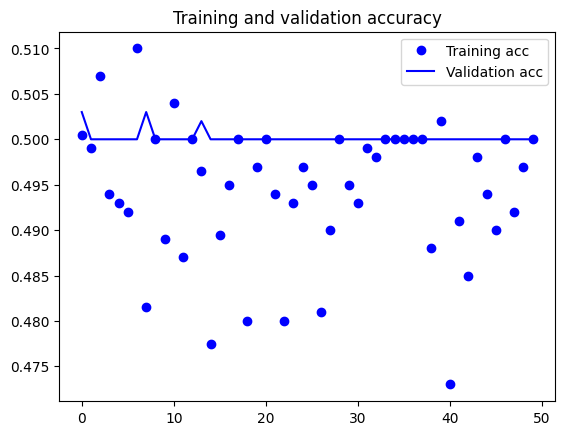

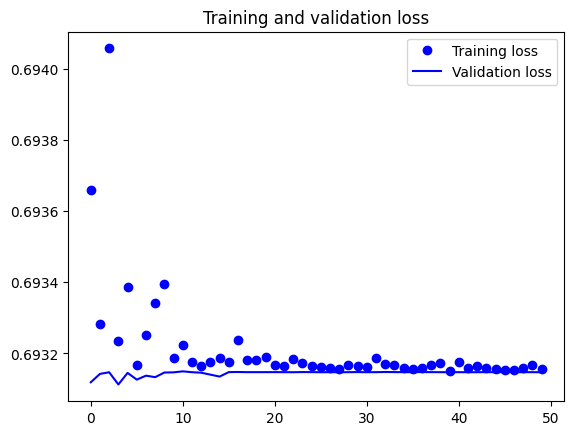

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()